# TALLER 2

**1. Multiplicación de Matrices:**

\begin{equation}
A =
\left(\begin{array}{cc} 1 & 2\\ 3 & 4 \end{array}\right)
\end{equation}

\begin{equation}
B =
\left(\begin{array}{cc} 5 & 6\\ 7 & 8 \end{array}\right)
\end{equation}

\begin{equation}
C = 
\left(\begin{array}{cc} 1 & 2\\ 3 & 4 \end{array}\right)
\left(\begin{array}{cc} 5 & 6\\ 7 & 8 \end{array}\right) 
=
\left(\begin{array}{cc} 19 & 22\\ 43 & 50 \end{array}\right) 
\end{equation}



In [0]:
import math
import numpy as np
import pylab as pl
import time
%matplotlib inline

In [0]:
class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)

def multiply(matrizA,matrizB,n,acct):
    matrizC=[];acct.count()
    for k in range(n):
      matrizC.append([0]*n);acct.count()
      for i in range(n):
        matrizC[k][i] = 0;acct.count()
      
    for i in range(n):
      acct.count()
      for j in range(n):
        acct.count()
        for k in range(n):
          acct.count()
          matrizC[i][k] = matrizC[i][k] + (matrizA[i][j]* matrizB[j][k])
          acct.count()
    

In [0]:
def exper_analysis(n):
    tic = time.clock()#get start time
    results = []
    acct = Counter()
    for i in range(0,n,2):
        A = [[np.random.randint(1,10) for row in range(i)] for col in range(i)]
        B = [[np.random.randint(1,10) for row in range(i)] for col in range(i)]
        acct.reset()
        multiply(A,B,i,acct)
        results.append(acct.steps)
    toc = time.clock()#get final time
    print("Final time=",toc)
    return results

Final time= 116.131928


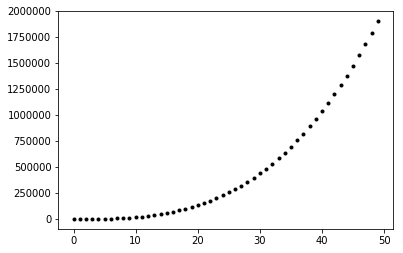

In [0]:
pl.clf()
x = np.arange(50)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

In [0]:
matrizA=[]
matrizB=[]
matrizC=[]

filasA = int(input("MATRIZ A # Filas: "))
columnaA = int(input("MATRIZ A # Columnas: "))
filasB = int(input("MATRIZ B # Filas : "))
columnasB = int(input("MATRIZ B # Columnas: "))

if columnaA != filasB:
  print("No Tiene Solución")
else:
  print("\nMatriz A")
  for i in range(filasA):
    matrizA.append([0]*columnaA)
  for f in range(filasA):
    for c in range(columnaA):
      matrizA[f][c] = int(input("Elemento %d,%d: "%(f,c)))
      
  print("\nMatriz B")
  for i in range(filasB):
    matrizB.append([0]*columnasB)
  for f in range(filasB):
    for c in range(columnasB):
      matrizB[f][c] = int(input("Elemento %d,%d: "%(f,c)))
      
  print("\nMatriz A")
  print(matrizA)
  print("\nMatriz B")
  print(matrizB)

  print("\nResultado de Multiplicación\n")
  
  for k in range(filasA):
    matrizC.append([0]*columnasB)
    for i in range(columnasB):
      matrizC[k][i] = 0
      
  for i in range(filasA):
    for j in range(columnaA):
      for k in range(columnasB):
        matrizC[i][k] = matrizC[i][k] + (matrizA[i][j]* matrizB[j][k])
        
  print("Matriz C")
  print(matrizC)
    
    


MATRIZ A # Filas: 2
MATRIZ A # Columnas: 2
MATRIZ B # Filas : 2
MATRIZ B # Columnas: 2

Matriz A
Elemento 0,0: 1
Elemento 0,1: 2
Elemento 1,0: 3
Elemento 1,1: 4

Matriz B
Elemento 0,0: 5
Elemento 0,1: 6
Elemento 1,0: 7
Elemento 1,1: 8

Matriz A
[[1, 2], [3, 4]]

Matriz B
[[5, 6], [7, 8]]

Resultado de Multiplicación

Matriz C
[[19, 22], [43, 50]]


**2. Algoritmo de multiplicación de matrices basado en una estrategía de multiplicación de matrices donde cada matriz es dividida en 4 partes iguales. **


In [0]:
def split(matriz): # dividir la matriz en cuartos
    a = matriz
    b = matriz
    c = matriz
    d = matriz
    while(len(a) > len(matriz)/2):
        a = a[:len(a)//2]
        b = b[:len(b)//2]
        c = c[len(c)//2:]
        d = d[len(d)//2:]
    while(len(a[0]) > len(matriz[0])/2):
        for i in range(len(a[0])//2):
            a[i] = a[i][:len(a[i])//2]
            b[i] = b[i][len(b[i])//2:]
            c[i] = c[i][:len(c[i])//2]
            d[i] = d[i][len(d[i])//2:]
    return a,b,c,d
#Matriz A  
a11, a12, a21, a22 = split(a)
#Matriz B
b11, b12, b21, b22 = split(b)
    

**3. Algoritmo Strassen**

> Procedimiento de Multiplicación:

\begin{equation} 
\left(\begin{array}{cc} A & B\\ C & D \end{array}\right)
\left(\begin{array}{cc} E & F\\ G & H \end{array}\right) 
=
\left(\begin{array}{cc} P_{5}+P_{4}-P_{2}+P_{6} & P_{1}+P_{2}\\ P_{3}+P_{4} & P_{1}+P_{5}-P_{3}-P_{7} \end{array}\right) 
\end{equation}

> Matrices:  \begin{equation}P_{1-7}\end{equation}

> La definición de estas matrices implica cada una un producto de submatrices desde la A hata la H.

\begin{equation}P_1 = A * (F - H)\end{equation}
\begin{equation}P_2 = (A + B) * H\end{equation}
\begin{equation}P_3 = (C + D) * E\end{equation}
\begin{equation}P_4 = D * (G - E)\end{equation}
\begin{equation}P_5 = (A + D) * (E + H)\end{equation}
\begin{equation}P_6 = (B - D) * (G + H)\end{equation}
\begin{equation}P_7 = (A - C) * (E + F)
\end{equation}

>Aquí tenemos los siete productos que realiza el algoritmo de Strassen para resolver cada subproblema.

In [0]:
matrizA = [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
matrizB = [[5,5,5,5],[6,6,6,6],[7,7,7,7],[8,8,8,8]]

def new_m(p, q):
    matriz = [[0 for row in range(p)] for col in range(q)]
    return matriz

def split(matriz): # dividir la matriz en cuartos
    a = matriz
    b = matriz
    c = matriz
    d = matriz
    while(len(a) > len(matriz)/2):
        a = a[:len(a)//2]
        b = b[:len(b)//2]
        c = c[len(c)//2:]
        d = d[len(d)//2:]
    while(len(a[0]) > len(matriz[0])/2):
        for i in range(len(a[0])//2):
            a[i] = a[i][:len(a[i])//2]
            b[i] = b[i][len(b[i])//2:]
            c[i] = c[i][:len(c[i])//2]
            d[i] = d[i][len(d[i])//2:]
    return a,b,c,d

def add_m(a, b):
    if type(a) == int:
        d = a + b
    else:
        d = []
        for i in range(len(a)):
            c = []
            for j in range(len(a[0])):
                c.append(a[i][j] + b[i][j])
            d.append(c)
    return d

def sub_m(a, b):
    if type(a) == int:
        d = a - b
    else:
        d = []
        for i in range(len(a)):
            c = []
            for j in range(len(a[0])):
                c.append(a[i][j] - b[i][j])
            d.append(c)
    return d

def strassen(a, b, q):
    # CASO BASE MATRIZ 1X1
    if q == 1:
        d = [[0]]
        d[0][0] = a[0][0] * b[0][0]
        return d
    else:
        #Dividir matriz en cuatro
        a11, a12, a21, a22 = split(a)
        b11, b12, b21, b22 = split(b)
        # p1 = (a11+a22) * (b11+b22)
        p1 = strassen(add_m(a11,a22), add_m(b11,b22), q/2)
        # p2 = (a21+a22) * b11
        p2 = strassen(add_m(a21,a22), b11, q/2)
        # p3 = a11 * (b12-b22)
        p3 = strassen(a11, sub_m(b12,b22), q/2)
        # p4 = a22 * (b21-b11)
        p4 = strassen(a22, sub_m(b21,b11), q/2)
        # p5 = (a11+a12) * b22
        p5 = strassen(add_m(a11,a12), b22, q/2)
        # p6 = (a21-a11) * (b11+b12)
        p6 = strassen(sub_m(a21,a11), add_m(b11,b12), q/2)
        # p7 = (a12-a22) * (b21+b22)
        p7 = strassen(sub_m(a12,a22), add_m(b21,b22), q/2)
        # c11 = p1 + p4 - p5 + p7
        c11 = add_m(sub_m(add_m(p1, p4), p5), p7)
        # c12 = p3 + p5
        c12 = add_m(p3, p5)
        # c21 = p2 + p4
        c21 = add_m(p2, p4)
        # c22 = p1 + p3 - p2 + p6
        c22 = add_m(sub_m(add_m(p1, p3), p2), p6)
        c = new_m(len(c11)*2,len(c11)*2)
        for i in range(len(c11)):
            for j in range(len(c11)):
                c[i][j]                   = c11[i][j]
                c[i][j+len(c11)]          = c12[i][j]
                c[i+len(c11)][j]          = c21[i][j]
                c[i+len(c11)][j+len(c11)] = c22[i][j]
        return c
print("Strassen:")
print(strassen(matrizA, matrizB, 4))

Strassen:
[[26, 26, 26, 26], [52, 52, 52, 52], [78, 78, 78, 78], [104, 104, 104, 104]]


In [0]:
class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print ("Number of steps =", self.steps)
        

def new_m(p, q, acct):
    acct.count()
    matriz = [[0 for row in range(p)] for col in range(q)]
    acct.count()
    return matriz

def split(matriz, acct): # dividir la matriz en cuartos
    a = matriz
    acct.count()
    b = matriz
    acct.count()
    c = matriz
    acct.count()
    d = matriz
    acct.count()
    while(len(a) > len(matriz)/2):
        acct.count()
        a = a[:len(a)//2]
        acct.count()
        b = b[:len(b)//2]
        acct.count()
        c = c[len(c)//2:]
        acct.count()
        d = d[len(d)//2:]
        acct.count()
    while(len(a[0]) > len(matriz[0])/2):
        acct.count()
        for i in range(len(a[0])//2):
            acct.count()
            a[i] = a[i][:len(a[i])//2]
            acct.count()
            b[i] = b[i][len(b[i])//2:]
            acct.count()
            c[i] = c[i][:len(c[i])//2]
            acct.count()
            d[i] = d[i][len(d[i])//2:]
            acct.count()
    return a,b,c,d

def add_m(a, b, acct):
    acct.count()
    if type(a) == int:
        d = a + b;acct.count()
    else:
        acct.count()
        d = []
        acct.count()
        for i in range(len(a)):
            acct.count()
            c = []
            for j in range(len(a[0])):
                acct.count()
                c.append(a[i][j] + b[i][j])
                acct.count()
            d.append(c);acct.count()
    return d

def sub_m(a, b, acct):
    if type(a) == int:
        d = a - b;acct.count()
    else:
        d = [];acct.count()
        for i in range(len(a)):
            c = [];acct.count()
            for j in range(len(a[0])):
                c.append(a[i][j] - b[i][j]);acct.count()
            d.append(c);acct.count()
    return d

def strassen(a, b, q, acct):
    # CASO BASE MATRIZ 1X1
    if q == 1:
        acct.count()
        d = [[0]]
        acct.count()
        d[0][0] = a[0][0] * b[0][0]
        acct.count()
    else:
        #Dividir matriz en cuatro
        acct.count()
        a11, a12, a21, a22 = split(a, acct)
        acct.count()
        b11, b12, b21, b22 = split(b, acct)
        acct.count()
        # p1 = (a11+a22) * (b11+b22)
        p1 = strassen(add_m(a11,a22,acct), add_m(b11,b22,acct), q/2, acct)
        acct.count()
        # p2 = (a21+a22) * b11
        p2 = strassen(add_m(a21,a22,acct), b11, q/2, acct)
        acct.count()
        # p3 = a11 * (b12-b22)
        p3 = strassen(a11, sub_m(b12,b22), q/2, acct)
        acct.count()
        # p4 = a22 * (b21-b11)
        p4 = strassen(a22, sub_m(b21,b11), q/2, acct)
        acct.count()
        # p5 = (a11+a12) * b22
        p5 = strassen(add_m(a11,a12,acct), b22, q/2, acct)
        acct.count()
        # p6 = (a21-a11) * (b11+b12)
        p6 = strassen(sub_m(a21,a11), add_m(b11,b12,acct), q/2, acct)
        acct.count()
        # p7 = (a12-a22) * (b21+b22)
        p7 = strassen(sub_m(a12,a22), add_m(b21,b22,acct), q/2, acct)
        acct.count()
        # c11 = p1 + p4 - p5 + p7
        c11 = add_m(sub_m(add_m(p1, p4,acct), p5), p7)
        acct.count()
        # c12 = p3 + p5
        c12 = add_m(p3, p5,acct)
        acct.count()
        # c21 = p2 + p4
        c21 = add_m(p2, p4,acct)
        acct.count()
        # c22 = p1 + p3 - p2 + p6
        c22 = add_m(sub_m(add_m(p1, p3,acct), p2,acct), p6,acct)
        acct.count()
        c = new_m(len(c11)*2,len(c11)*2,acct)
        acct.count()
        for i in range(len(c11)):
            acct.count()
            for j in range(len(c11)):
                acct.count()
                c[i][j]                   = c11[i][j]
                acct.count()
                c[i][j+len(c11)]          = c12[i][j]
                acct.count()
                c[i+len(c11)][j]          = c21[i][j]
                acct.count()
                c[i+len(c11)][j+len(c11)] = c22[i][j]
                acct.count()


In [0]:
def exper_analysis_s(n):
    tic = time.clock()#get start time
    results = []
    acct = Counter()
    for i in range(4,n,2):
        A = [[np.random.randint(1,10) for row in range(i)] for col in range(i)]
        B = [[np.random.randint(1,10) for row in range(i)] for col in range(i)]
        acct.reset()
        strassen(A, B, i, acct)
        results.append(acct.steps)
    toc = time.clock()#get final time
    print("Final time=",toc)
    return results

In [0]:
pl.clf()
x = np.arange(50)
y = np.array(exper_analysis_s(100))
print(x,y)
pl.plot(x, y, 'k.')